In [27]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.stats import pearsonr
from scipy.cluster.hierarchy import linkage, dendrogram



In [28]:
PATH = 'Country-data.csv'

df = pd.read_csv(PATH)

In [29]:
df.shape

(167, 10)

In [30]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [31]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [32]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


<!-- <hr style="border:none;height:0.7px;" />
 -->
 
--- 

# Preprocessing the data

In this section, I'm preprocessing the data for the model to use.
1. Null values
2. Duplicates
3. Wrong formats
4. Shuffling the dataset
5. Scaling data and encoding labels

Finding the missing values and duplicates in the data:

In [33]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [34]:
df.duplicated().sum()

0

As we can see, no null or duplicates

The dataset is alphabetically ordered. This could introduce bias and linear ordering so I'll shuffle the dataset to remove the alphabetical ordering as you can see below:

In [35]:
df = df.sample(frac=1).reset_index(drop=True)

df.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Ukraine,11.7,47.10,7.72,51.1,7820,13.400,70.4,1.44,2970
1,Philippines,31.9,34.80,3.61,36.6,5600,4.220,69.0,3.16,2130
2,Kazakhstan,21.5,44.20,4.29,29.9,20100,19.500,68.4,2.60,9070
3,Netherlands,4.5,72.00,11.90,63.6,45500,0.848,80.7,1.79,50300
4,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310
5,Uganda,81.0,17.10,9.01,28.6,1540,10.600,56.8,6.15,595
6,Finland,3.0,38.70,8.95,37.4,39800,0.351,80.0,1.87,46200
7,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
8,Turkey,19.1,20.40,6.74,25.5,18000,7.010,78.2,2.15,10700
9,Nepal,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592


Changing the data type of `income` and `gdp` to a float to have consistent data types across the dataset:

In [36]:
cols = ['income', 'gdpp']

for col in cols:
    df[col] = df[col].astype(float)

Below I'll encode the country names as the model does not accept categorical data (objects, strings, etc)

In [37]:
encoder = LabelEncoder()

df['country'] = encoder.fit_transform(df['country'])

Finally, I'll scale the data so the distance between values is lowered for model efficiency

In [38]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols:
    df[[col]] = scaler.fit_transform(df[[col]])

If we take a look now, the data is scaled

In [39]:
df.head(7)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,156,-0.660815,0.219212,0.330209,0.174412,-0.485149,0.533083,-0.017559,-0.999109,-0.546913
1,120,-0.158428,-0.230846,-1.170557,-0.426325,-0.600652,-0.337967,-0.175457,0.140486,-0.592881
2,79,-0.417083,0.113101,-0.922255,-0.703908,0.153760,1.111885,-0.243127,-0.230545,-0.213101
3,110,-0.839884,1.130305,1.856536,0.692289,1.475282,-0.657921,1.144116,-0.767215,2.043141
4,28,1.734230,-0.691881,-0.615529,-0.824055,-0.753616,-0.557152,-1.495030,1.432468,-0.637754
5,155,1.062722,-0.878490,0.801253,-0.757767,-0.811887,0.267404,-1.551422,2.121525,-0.676881
6,53,-0.877190,-0.088145,0.779344,-0.393181,1.178720,-0.705079,1.065167,-0.714211,1.818776


<!-- <hr style="border:none;height:0.7px;" />
 -->
 
---

# Reducing dimension and noise

Reducing the dimension and removing noise can optimize the model. Below I'll take the first 2 pca features and use it in the cluster.

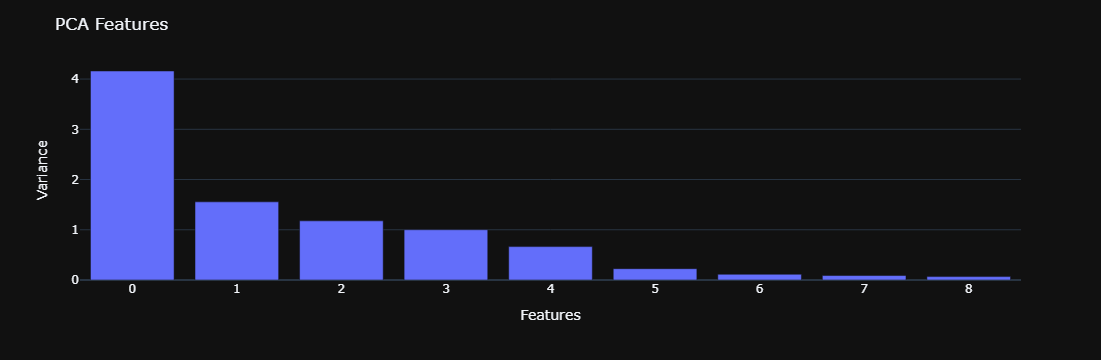

In [40]:
ndf = df.drop(labels='country', axis=1)

pca = PCA(n_components=9)

pca_df = pca.fit_transform(ndf)

# create range enumerating pca feats
features = range(pca.n_components_)

fig = px.bar(x=features, y=pca.explained_variance_, template='plotly_dark')
fig.update_layout(title='PCA Features')
fig.update_xaxes(title_text="Features")
fig.update_yaxes(title_text="Variance")

fig.show()

<!-- <hr style="border:none;height:0.7px;" /> -->

---

# Training the model and creating the clusters

In the first section I'm finding the optimal `n_clusters` hyperparameter to find the best number of clusters to reduce inertia.

As we can see below, 3 clusters are at the elbow but I'll go with 4

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

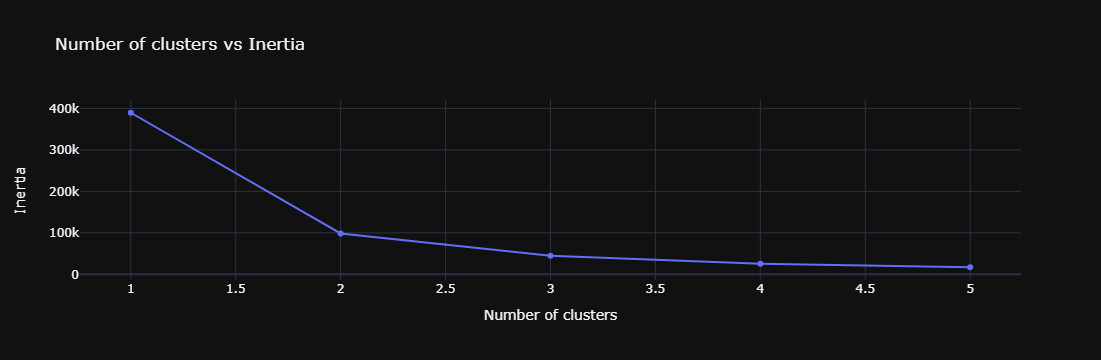

In [41]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    
    model.fit(df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
fig = px.line(x=ks, y=inertias, markers=True, title='Optimal number of clusters', template='plotly_dark')
fig.update_layout(title='Number of clusters vs Inertia')
fig.update_xaxes(title_text="Number of clusters")
fig.update_yaxes(title_text="Inertia")
fig.show()

---

# Training the model

Below I'm training the model and using 4 clusters as my hyperparameter. 

In the scatter plot below, we see there are 4 clusters and their centroids

In [42]:
model = KMeans(n_clusters=4)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



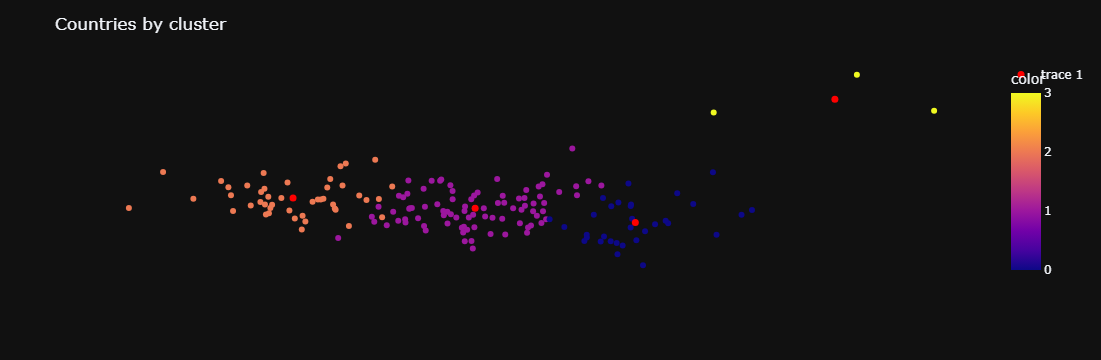

In [43]:
labels = model.fit_predict(pca_df)

centroids = model.cluster_centers_

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

fig = px.scatter(pca_df, x=pca_df[:, 0], y=pca_df[:, 1], color=labels, template='plotly_dark')
fig.update_layout(title='Countries by cluster')
fig.update_layout(xaxis_visible=False, yaxis_visible=False, 
                  xaxis=dict(showgrid=False, zeroline=False), 
                  yaxis=dict(showgrid=False, zeroline=False))
fig.add_trace(go.Scatter(x=centroids_x, y=centroids_y, mode='markers', 
                         marker=dict(color='red', size=7)))
fig.show()

<!-- <hr style="border:none;height:0.7px;" />
 -->
 
 --- 
 
# Plotting a dendrogram

Dendrograms visualize the cluster hierarchies and make it easier to understand. Each cluster in the dendrogram shows which cluster each country belongs in.

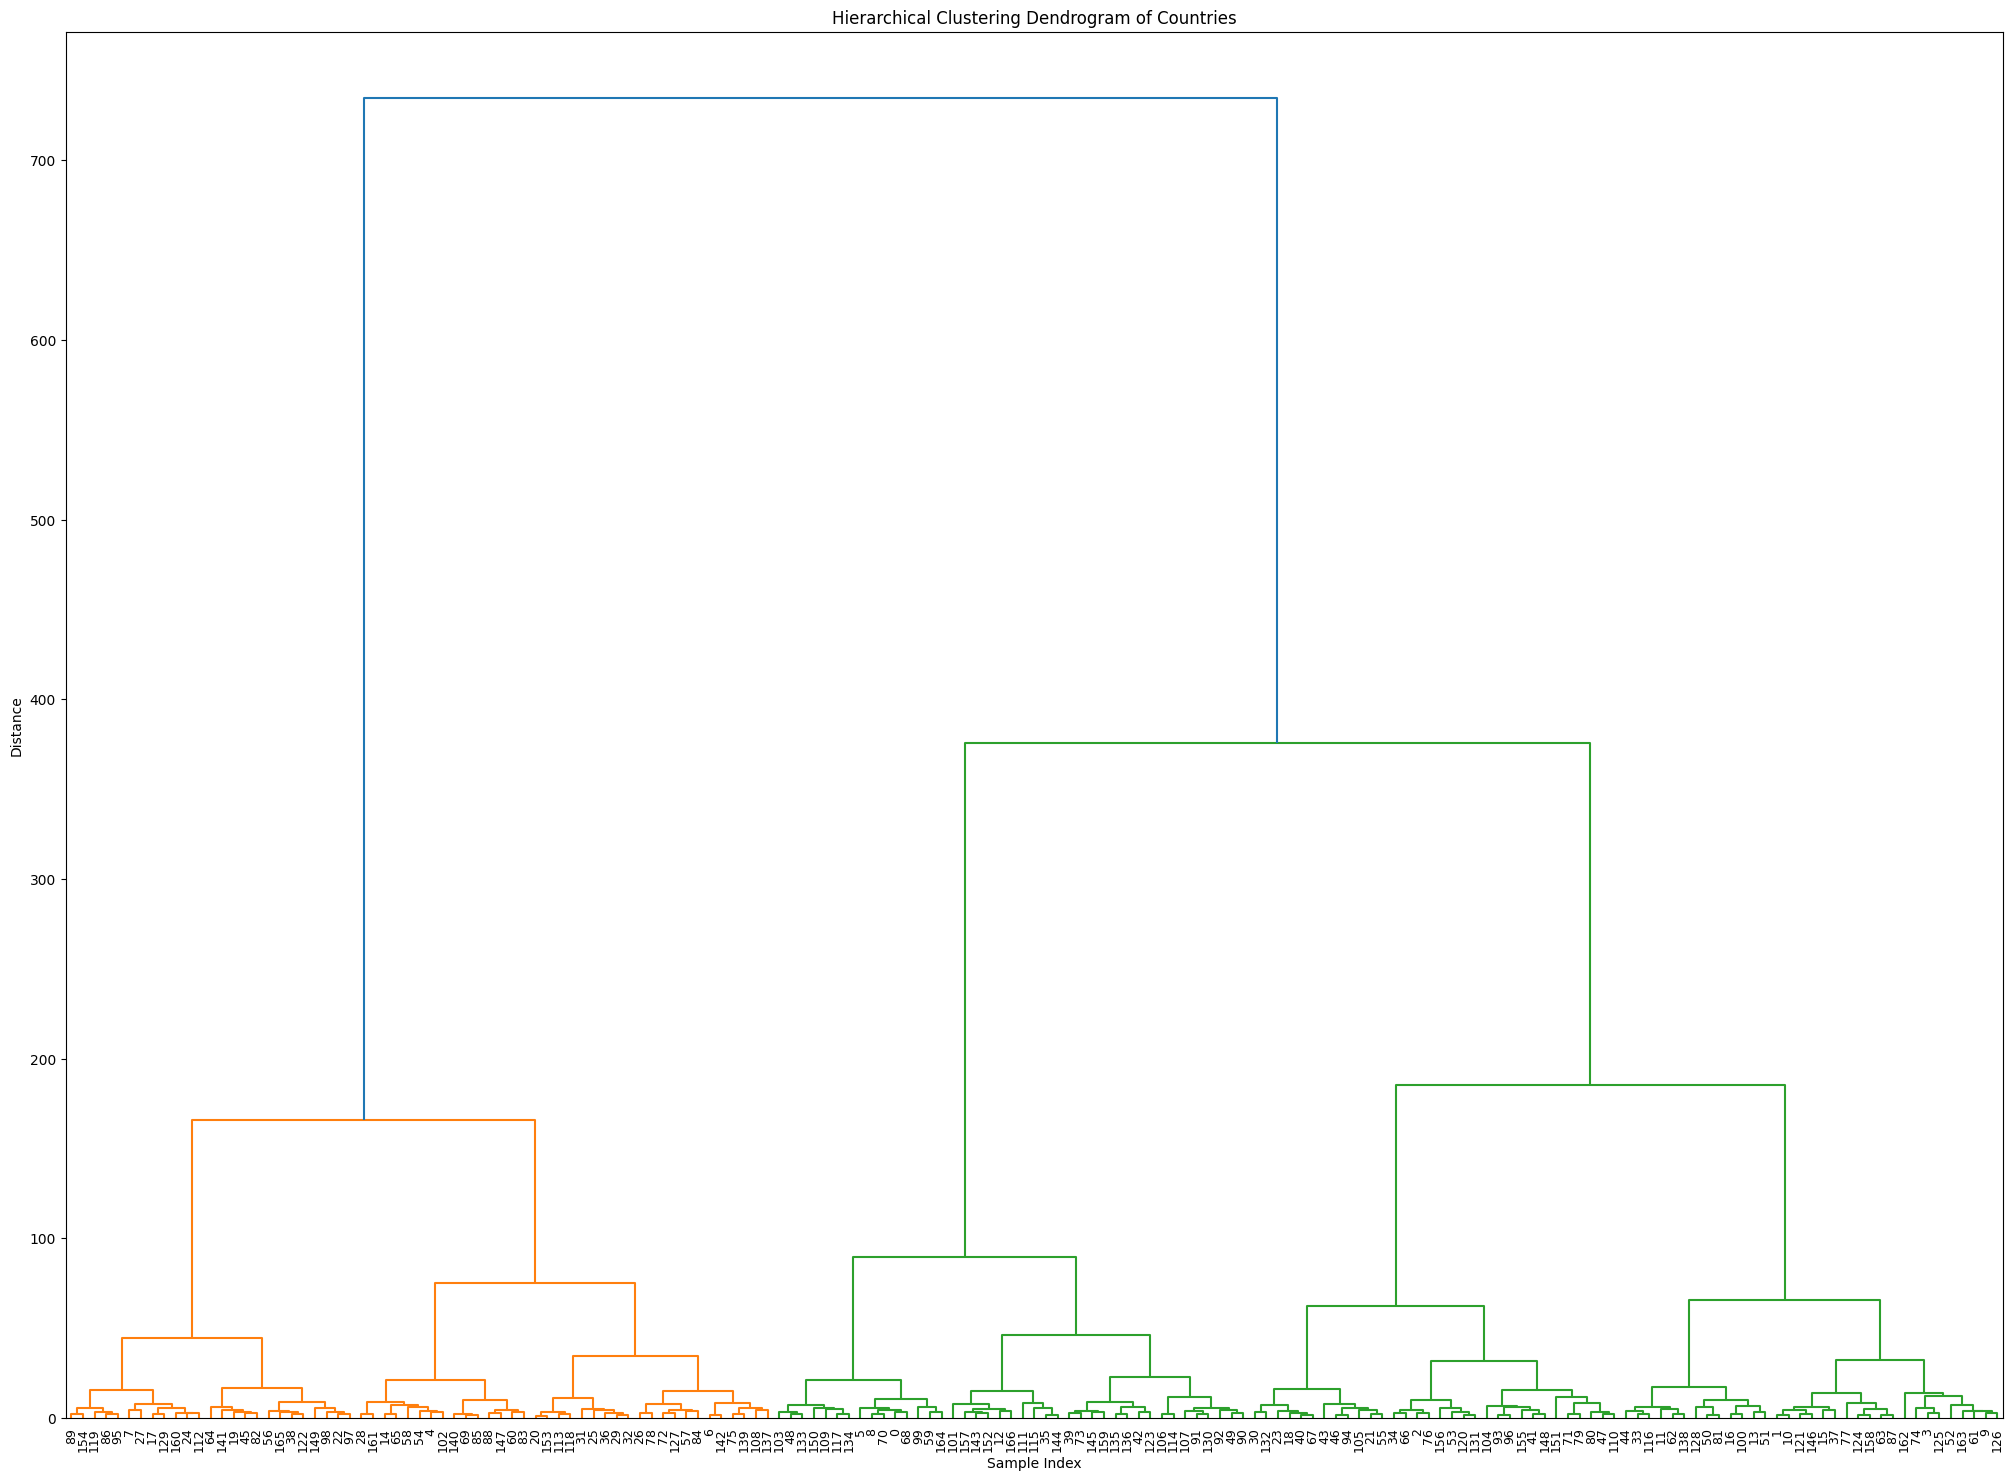

In [44]:
z = linkage(df, method='ward')

plt.figure(figsize=(25,18))
plt.title('Hierarchical Clustering Dendrogram of Countries')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(z, leaf_rotation=90, leaf_font_size=9)
plt.show()

<!-- <hr style="border:none;height:0.7px;" />
 -->
 
 --- 
 
# Conclusion

Below is a list of the 3 clusters and each country within those clusters. They're categorized by:

- High income, low child mortality rate
- Medium income, medium child mortality rate
- Low income, high child mortality rate

This can now be used to find which countries are most in need of the 10 million in humanitarian aid funding.

In [45]:
# Function to get cluster rows and country names
def get_cluster_rows_and_country_names(model, df, encoder, cluster_label):
    cluster_indices = np.where(model.labels_ == cluster_label)[0]
    cluster_rows = df.iloc[cluster_indices]
    cluster_country_names = encoder.inverse_transform(cluster_rows['country'])
    return cluster_rows, cluster_country_names

In [46]:
cluster_rows1, cluster_country_names1 = get_cluster_rows_and_country_names(model, df, encoder, 0)
cluster_rows2, cluster_country_names2 = get_cluster_rows_and_country_names(model, df, encoder, 1)
cluster_rows3, cluster_country_names3 = get_cluster_rows_and_country_names(model, df, encoder, 2)
cluster_rows4, cluster_country_names4 = get_cluster_rows_and_country_names(model, df, encoder, 3)

# Print the country names of the rows that belong to the third cluster
print(f'Cluster 1 👇 \n\n{cluster_country_names1}\n\n')
print(f'Cluster 2 👇 \n\n{cluster_country_names2}\n\n')
print(f'Cluster 3 👇 \n\n{cluster_country_names3}\n\n')
print(f'Cluster 4 👇 \n\n{cluster_country_names4}\n\n')

Cluster 1 👇 

['Netherlands' 'Finland' 'Denmark' 'Greece' 'Cyprus' 'Iceland'
 'Czech Republic' 'Japan' 'Canada' 'United Kingdom' 'Brunei' 'Norway'
 'Qatar' 'Germany' 'Portugal' 'Austria' 'Bahamas' 'United Arab Emirates'
 'Kuwait' 'Sweden' 'Switzerland' 'Israel' 'New Zealand' 'Italy'
 'South Korea' 'Spain' 'France' 'Slovenia' 'Belgium' 'Australia' 'Ireland'
 'United States']


Cluster 2 👇 

['Ukraine' 'Philippines' 'Kazakhstan' 'Turkey' 'Nepal' 'Peru' 'Mongolia'
 'Serbia' 'Oman' 'Albania' 'Iran' 'Botswana' 'Dominican Republic'
 'Belarus' 'Iraq' 'Armenia' 'Costa Rica' 'Moldova' 'Jamaica'
 'Slovak Republic' 'Croatia' 'Bolivia' 'Sri Lanka' 'Indonesia'
 'Solomon Islands' 'Mauritius' 'Brazil' 'Guatemala' 'Libya' 'Uruguay'
 'Tonga' 'Malaysia' 'Cape Verde' 'Myanmar' 'Morocco' 'Poland' 'Jordan'
 'India' 'Turkmenistan' 'Colombia' 'Tunisia'
 'St. Vincent and the Grenadines' 'Fiji' 'Macedonia, FYR' 'Maldives'
 'Bosnia and Herzegovina' 'Georgia' 'China' 'Bahrain' 'Tajikistan'
 'Thailand' 'Latvia' '

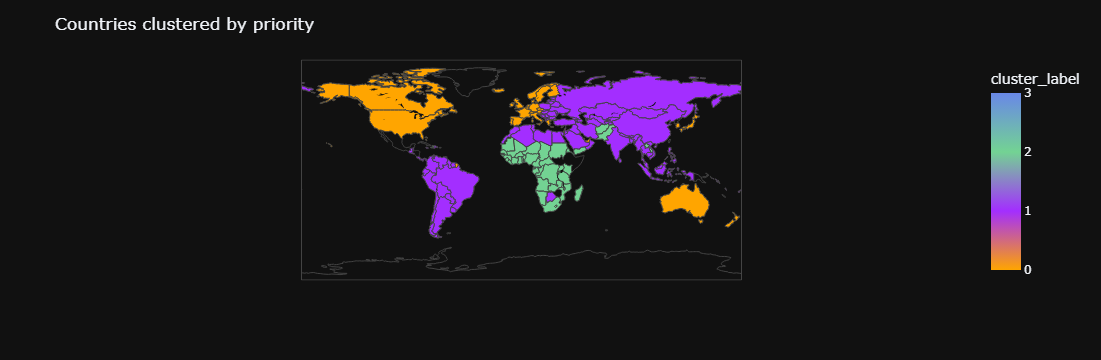

In [47]:
custom_colors = ['#FFA500', '#A32EFF', '#73D393', '#6988E7']

# Creating a new DataFrame with country and cluster label
cluster_data = pd.DataFrame({'country': encoder.inverse_transform(df['country']),
                             'cluster_label': model.labels_})

# Creating the choropleth map
fig = px.choropleth(data_frame=cluster_data, locations='country', locationmode='country names', 
                    color='cluster_label', template='plotly_dark', color_continuous_scale=custom_colors, range_color=[0, 3])

# Updating the layout to include a title
fig.update_layout(title='Countries clustered by priority')

# Showing the plot
fig.show()